# Loading the Dataset

In [1]:
#importing pandas and uploading dataset
import pandas as pd
stories = pd.read_csv('Edgar_Allan_Poe_short_stories_preprocessed_data.csv')
stories.head()

title  \
0    A DESCENT INTO THE MAELSTRÖM   
1                   A PREDICAMENT   
2             A TALE OF JERUSALEM   
3  A TALE OF THE RAGGED MOUNTAINS   
4                        BERENICE   

                                                text  \
0  The ways of God in Nature, as in Providence, a...   
1  What chance, good lady, hath bereft you thus? ...   
2  Intensos rigidarn in frontern ascendere canos ...   
3  DURING the fall of the year 1827, while residi...   
4  Dicebant mihi sodales, si sepulchrum amicae vi...   

                  wikipedia_title publication_date  \
0    A Descent into the Maelström         May 1841   
1                   A Predicament    November 1838   
2             A Tale of Jerusalem     June 9, 1832   
3  A Tale of the Ragged Mountains       April 1844   
4                        Berenice       March 1835   

              first_published_in             classification  \
0              Graham's Magazine                  Adventure   
1      Baltimore American Museum                     Parody   
2  Philadelphia Saturday Courier                      Humor   
3            Godey's Lady's Book  Adventure,Science_fiction   
4    Southern Literary Messenger                     Horror   

                                               notes normalized_date  
0                                                  ?        May 1841  
1  Companion to "How to Write a Blackwood Article...   November 1838  
2                                                  ?       June 1832  
3                                                  ?      April 1844  
4                                                  ?      March 1835

In [2]:
#removing less relevant columns from dataframe
stories = stories.drop('wikipedia_title', axis = 1)
stories = stories.drop('publication_date', axis = 1)
stories = stories.drop('first_published_in', axis = 1)
stories = stories.drop('notes', axis = 1)
stories.head()

title  \
0    A DESCENT INTO THE MAELSTRÖM   
1                   A PREDICAMENT   
2             A TALE OF JERUSALEM   
3  A TALE OF THE RAGGED MOUNTAINS   
4                        BERENICE   

                                                text  \
0  The ways of God in Nature, as in Providence, a...   
1  What chance, good lady, hath bereft you thus? ...   
2  Intensos rigidarn in frontern ascendere canos ...   
3  DURING the fall of the year 1827, while residi...   
4  Dicebant mihi sodales, si sepulchrum amicae vi...   

              classification normalized_date  
0                  Adventure        May 1841  
1                     Parody   November 1838  
2                      Humor       June 1832  
3  Adventure,Science_fiction      April 1844  
4                     Horror      March 1835

# Exploratory Data Analysis

In [3]:
#concatenating all the stories into one string
all_stories = " ".join(stories['text'])

In [4]:
#printing all the short stories
print(all_stories)

The ways of God in Nature, as in Providence, are not as our ways; nor are the models that we frame any way commensurate to the vastness, profundity, and unsearchableness of His works, which have a depth in them greater than the well of Democritus. Joseph Glanville.    WE had now reached the summit of the loftiest crag. For some minutes the old man seemed too much exhausted to speak.     “Not long ago,” said he at length, “and I could have guided you on this route as well as the youngest of my sons; but, about three years past, there happened to me an event such as never happened to mortal man—or at least such as no man ever survived to tell of—and the six hours of deadly terror which I then endured have broken me up body and soul. You suppose me a very old man—but I am not. It took less than a single day to change these hairs from a jetty black to white, to weaken my limbs, and to unstring my nerves, so that I tremble at the least exertion, and am frightened at a shadow. Do you know I 

In [5]:
#checking the length of all the stories
len(all_stories)

1914346

In [6]:
#importing libraries to create wordclouds
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [7]:
#defining wordcloud function
def create_wordcloud(text):
    text = str(text)
    wordcloud = WordCloud(width = 800, height = 660, background_color = 'white', max_words = 300)
    plt.figure(figsize = (14,12))
    wordcloud = wordcloud.generate(text)
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis('off')
    plt.show()

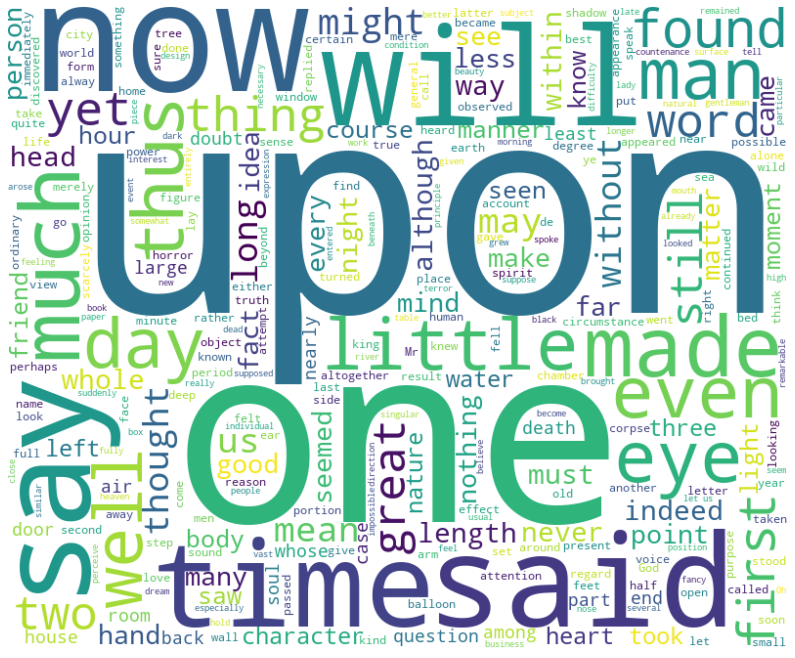

In [8]:
#wordcloud of all short stories before preprocessing
create_wordcloud(all_stories)

# Text Preprocessing

In [9]:
#making all letters in corpus lowercase
all_stories = all_stories.lower()

In [10]:
#importing spacy
import spacy

In [11]:
#loading English spacy model
nlp = spacy.load('en_core_web_sm')

In [12]:
#increasing max length to convert to doc object
if len(all_stories) <= 2000000:
    nlp.max_length = len(all_stories)

In [13]:
#converting corpus to doc object
doc = nlp(all_stories)

In [14]:
#printing corpus
print(doc)

the ways of god in nature, as in providence, are not as our ways; nor are the models that we frame any way commensurate to the vastness, profundity, and unsearchableness of his works, which have a depth in them greater than the well of democritus. joseph glanville.    we had now reached the summit of the loftiest crag. for some minutes the old man seemed too much exhausted to speak.     “not long ago,” said he at length, “and i could have guided you on this route as well as the youngest of my sons; but, about three years past, there happened to me an event such as never happened to mortal man—or at least such as no man ever survived to tell of—and the six hours of deadly terror which i then endured have broken me up body and soul. you suppose me a very old man—but i am not. it took less than a single day to change these hairs from a jetty black to white, to weaken my limbs, and to unstring my nerves, so that i tremble at the least exertion, and am frightened at a shadow. do you know i 

In [15]:
#list comprehension to lemmatize words and remove stop words, punctuation, digits, and anything that's not a noun or adjective
doc = [token.lemma_ for token in doc if (token.is_stop == False and token.is_punct == False and token.is_digit == False and (token.pos_ == 'NOUN' or token.pos_ == 'PROPN' or token.pos_ == 'ADJ'))]

In [16]:
print(doc)

['way', 'god', 'nature', 'providence', 'way', 'model', 'way', 'commensurate', 'vastness', 'profundity', 'unsearchableness', 'work', 'depth', 'great', 'democritus', 'joseph', 'glanville', 'summit', 'lofty', 'crag', 'minute', 'old', 'man', 'length', 'route', 'young', 'son', 'year', 'past', 'event', 'mortal', 'man', 'man', 'hour', 'deadly', 'terror', 'body', 'soul', 'old', 'man', 'single', 'day', 'hair', 'jetty', 'black', 'white', 'limb', 'nerve', 'exertion', 'shadow', 'little', 'cliff', 'giddy', 'little', 'cliff', 'edge', 'weighty', 'portion', 'body', 'tenure', 'elbow', 'extreme', 'slippery', 'edge', 'little', 'cliff', 'unobstructed', 'precipice', 'black', 'rock', 'foot', 'world', 'crag', 'dozen', 'yard', 'brink', 'truth', 'perilous', 'position', 'companion', 'length', 'ground', 'shrub', 'sky', 'vain', 'idea', 'foundation', 'mountain', 'danger', 'fury', 'wind', 'long', 'sufficient', 'courage', 'distance', 'fancy', 'guide', 'good', 'possible', 'view', 'scene', 'event', 'story', 'spot', 'e

In [17]:
#checking 50 most common nouns and adjectives in corpus
word_counts = pd.Series([token for token in doc]).value_counts()
print(word_counts[:50])

man          590
great        496
time         493
little       444
eye          442
day          432
thing        387
mr           348
word         332
good         300
head         298
length       298
hand         277
old          272
way          264
matter       255
foot         251
point        245
long         239
night        236
fact         231
idea         230
body         229
person       214
year         208
hour         207
friend       204
manner       204
large        203
door         201
moment       198
room         193
course       191
character    189
minute       187
light        186
mind         186
death        180
general      179
life         178
nature       178
water        177
air          175
heart        173
voice        170
house        168
period       167
world        164
question     164
place        158
dtype: int64


In [18]:
#converting back to string
cleaned_stories = str(doc)

In [19]:
#printing string
print(cleaned_stories)

['way', 'god', 'nature', 'providence', 'way', 'model', 'way', 'commensurate', 'vastness', 'profundity', 'unsearchableness', 'work', 'depth', 'great', 'democritus', 'joseph', 'glanville', 'summit', 'lofty', 'crag', 'minute', 'old', 'man', 'length', 'route', 'young', 'son', 'year', 'past', 'event', 'mortal', 'man', 'man', 'hour', 'deadly', 'terror', 'body', 'soul', 'old', 'man', 'single', 'day', 'hair', 'jetty', 'black', 'white', 'limb', 'nerve', 'exertion', 'shadow', 'little', 'cliff', 'giddy', 'little', 'cliff', 'edge', 'weighty', 'portion', 'body', 'tenure', 'elbow', 'extreme', 'slippery', 'edge', 'little', 'cliff', 'unobstructed', 'precipice', 'black', 'rock', 'foot', 'world', 'crag', 'dozen', 'yard', 'brink', 'truth', 'perilous', 'position', 'companion', 'length', 'ground', 'shrub', 'sky', 'vain', 'idea', 'foundation', 'mountain', 'danger', 'fury', 'wind', 'long', 'sufficient', 'courage', 'distance', 'fancy', 'guide', 'good', 'possible', 'view', 'scene', 'event', 'story', 'spot', 'e

In [20]:
#importing re library to remove unnecessary quotation marks from updated wordcloud
import re
cleaned_stories = re.sub('\'','',cleaned_stories)

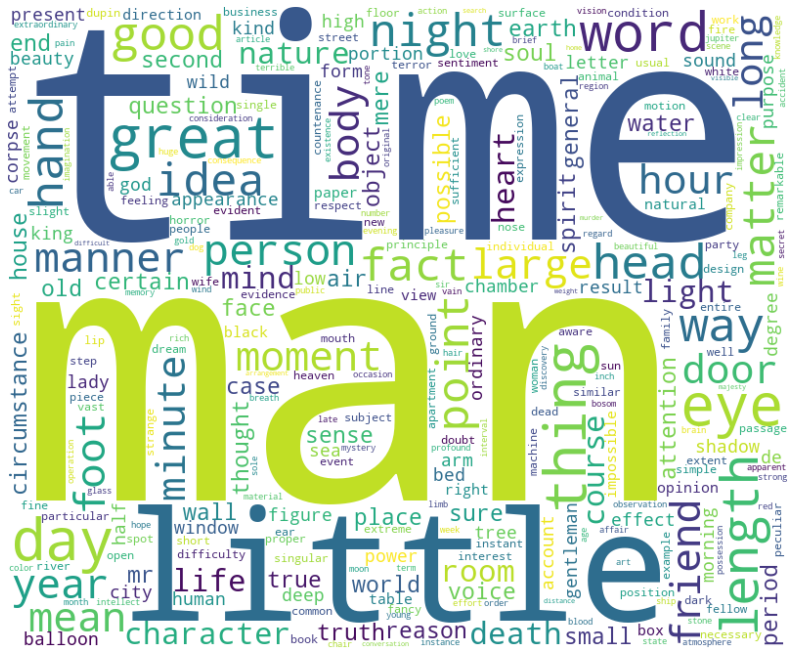

In [21]:
#wordcloud of preprocessed corpus
create_wordcloud(cleaned_stories)

# Topic Modeling

In [22]:
#importing gensim for topic modeling
from gensim import corpora, models

In [23]:
#defining vocab
vocab = [token.split() for token in doc]

In [24]:
#defining dictionary
dictionary = corpora.Dictionary(vocab)

In [25]:
#defining vectors
vectors = [dictionary.doc2bow(text) for text in vocab]

In [26]:
#using TF-IDF model
tfidf = models.TfidfModel(vectors)

In [27]:
#transforming TF-IDF
transformed_tfidf = tfidf[vectors]

In [28]:
#using Latent Dirichlet Allocation model and specifying number of topics and passes
lda = models.LdaMulticore(transformed_tfidf, num_topics = 6, id2word = dictionary, passes = 100)

In [29]:
#showing topic vectors
lda.show_topics()

[(0,
  '0.034*"man" + 0.031*"great" + 0.027*"little" + 0.025*"eye" + 0.019*"word" + 0.018*"good" + 0.013*"manner" + 0.011*"light" + 0.011*"period" + 0.009*"soul"'),
 (1,
  '0.021*"thing" + 0.012*"person" + 0.010*"death" + 0.009*"place" + 0.009*"certain" + 0.008*"circumstance" + 0.008*"gentleman" + 0.008*"face" + 0.008*"appearance" + 0.007*"degree"'),
 (2,
  '0.026*"day" + 0.018*"head" + 0.014*"night" + 0.012*"year" + 0.010*"question" + 0.010*"heart" + 0.010*"water" + 0.010*"case" + 0.008*"thought" + 0.008*"spirit"'),
 (3,
  '0.017*"length" + 0.016*"old" + 0.015*"way" + 0.014*"fact" + 0.014*"idea" + 0.013*"hour" + 0.009*"house" + 0.009*"balloon" + 0.009*"sense" + 0.009*"reason"'),
 (4,
  '0.030*"time" + 0.016*"hand" + 0.015*"foot" + 0.015*"body" + 0.014*"long" + 0.012*"large" + 0.012*"friend" + 0.011*"earth" + 0.011*"nature" + 0.010*"life"'),
 (5,
  '0.020*"mr" + 0.015*"matter" + 0.014*"point" + 0.012*"door" + 0.012*"course" + 0.012*"moment" + 0.011*"mind" + 0.011*"room" + 0.011*"minute

In [30]:
#importing LDA visualization tool
import pyLDAvis.gensim
pyLDAvis.enable_notebook()

In [31]:
#running gensim vectors through pyLDAvis
topics = pyLDAvis.gensim.prepare(lda, vectors, dictionary)

In [32]:
#showing main topics in Edgar Allan Poe's short stories
topics

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.026328  0.029182       1        1  16.994286
3      0.059827  0.096835       2        1  16.634018
5      0.135495 -0.334003       3        1  16.621908
2      0.066094  0.130176       4        1  16.607983
0     -0.358851 -0.057117       5        1  16.574545
4      0.071106  0.134926       6        1  16.567259, topic_info=        Term        Freq       Total Category  logprob  loglift
20       man  554.000000  554.000000  Default  30.0000  30.0000
11     great  492.000000  492.000000  Default  29.0000  29.0000
155     time  486.000000  486.000000  Default  28.0000  28.0000
44    little  428.000000  428.000000  Default  27.0000  27.0000
35       day  415.000000  415.000000  Default  26.0000  26.0000
..       ...         ...         ...      ...      ...      ...
620      new   80.524826   81.311401   Topic6  -5.2959   1.7880
34    single   78.255249   79.041824   Topic6  -5.3245   1.7877
576  feeling   77.852631   78.639206   Topic6  -5.3296   1.7877
449     fine   74.551735   75.338310   Topic6  -5.3730   1.7872
509      sun   73.911232   74.697807   Topic6  -5.3816   1.7872

[210 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
119       2  0.992872     account
629       3  0.995853         air
240       5  0.985850    apparent
150       1  0.991402  appearance
573       3  0.992520         arm
...     ...       ...         ...
409       5  0.998952        word
9         4  0.990933        work
58        6  0.995733       world
25        4  0.998099        year
23        3  0.994233       young

[180 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 4, 6, 3, 1, 5])